## Description
***



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from scipy import stats

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
# loading Argo EN4 data
ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
ds_EN4 = ds_EN4.sel(time=slice('2009-01','2014-04'))
ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15


# loading HYCOMcci data
ds_hycomcci = xr.open_dataset('../Data/HYCOMcciAVG_vertEN4_2009_2014_monthly.nc')
ds_hycomcci = ds_hycomcci.sel(time=slice('2009-01','2014-04'))
ds_hycomcci['time'].values = ds_EN4['time'].values


# loading HYCOMostia data
ds_hycomostia = xr.open_dataset('../Data/HYCOMostiaAVG_vertEN4_2009_2014_monthly.nc')
ds_hycomostia = ds_hycomostia.sel(time=slice('2009-01','2014-04'))
ds_hycomostia['time'].values = ds_EN4['time'].values


# loading HYCOMfree SST data
ds_hycomfree = xr.open_dataset('../Data/HYCOMfreeAVG_vertEN4_2009_2014_monthly.nc')
ds_hycomfree = ds_hycomfree.sel(time=slice('2009-01','2014-04'))
ds_hycomfree['time'].values = ds_EN4['time'].values

# 1. HYCOM<sub>CCI</sub> vs HYCOM<sub>FREE</sub>

## 1.1 Temperature

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


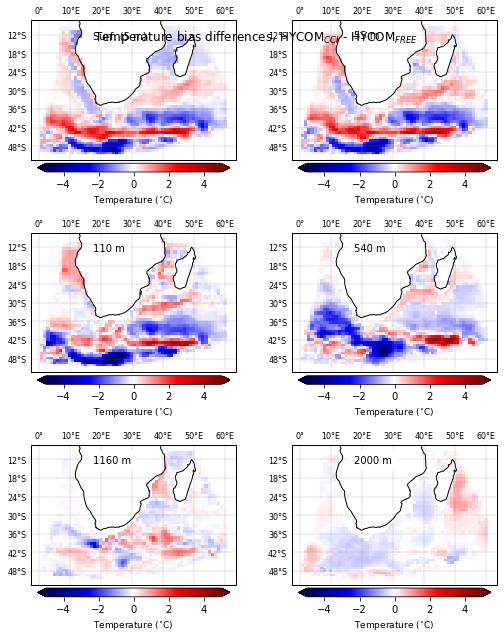

In [4]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature bias differences, HYCOM$_{CCI}$ - HYCOM$_{FREE}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomcci['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomfree['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-5, vmax=5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
# plt.savefig('../Figures/model_interior/Temp_Bias_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.1 Salinity

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


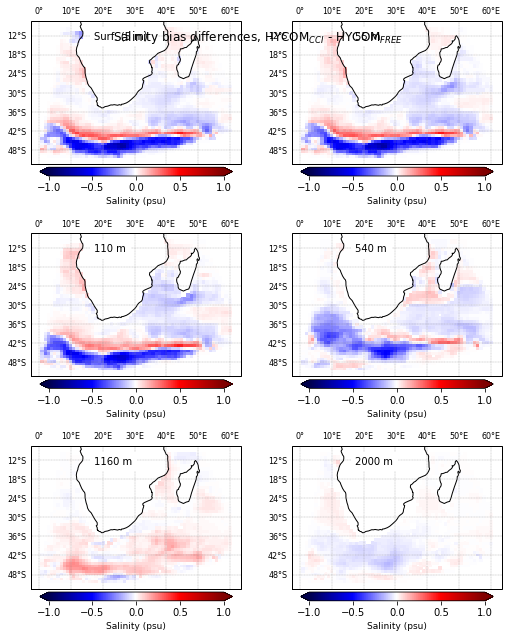

In [8]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity bias differences, HYCOM$_{CCI}$ - HYCOM$_{FREE}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomcci['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomfree['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-1, vmax=1)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Salinity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
# plt.savefig('../Figures/model_interior/Temp_Bias_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()